# Project: TMDB Movie DataSet


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Movie Database (TMDB), This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. i will try to figure out how
can we utilise that data to actually provide valuable output by different visualizations and then making sense out of that data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties
in this step,i will try to figure out what is our data looks like and how big or small i am going to deal with.

In [2]:
#load the csv file and view a sample of the data
df=pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
#know the dimintions of the original dataset
df.shape

(10866, 21)

In [4]:
#an overview for our dataset to know the data type and count for each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Data Cleaning

In [6]:
#check for duplicates and remove it
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
#remove columns that will not add valu to my analysis 
df.drop(['id','cast','homepage','director','tagline','keywords','overview','production_companies','budget_adj','revenue_adj','genres'],axis=1,inplace=True)
df.head(1)

,imdb_id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,2015


In [9]:
#check nulls and remove 'em
df.isnull().sum()

imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
runtime            0
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [10]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imdb_id         10855 non-null  object 
 1   popularity      10855 non-null  float64
 2   budget          10855 non-null  int64  
 3   revenue         10855 non-null  int64  
 4   original_title  10855 non-null  object 
 5   runtime         10855 non-null  int64  
 6   release_date    10855 non-null  object 
 7   vote_count      10855 non-null  int64  
 8   vote_average    10855 non-null  float64
 9   release_year    10855 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 932.9+ KB


In [11]:
# convert the release_date column to datetime
release_date=df.release_date = pd.to_datetime(df.release_date)
# extract year from release_date to create new columns
df['year'] = df['release_date'].dt.year
df.year.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 2068, 1974, 1975, 2062, 2064, 1971, 1990, 2061,
       2060, 1976, 1993, 2067, 2063, 1986, 1973, 2070, 2065, 2069, 1978,
       2066], dtype=int64)

In [12]:
df['release_year'].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

#### apparently the release_year column is making more sense so i'll delete the release_date and year columns.

In [13]:
df.drop(['release_date','year'],axis =1, inplace= True)
df.head()

,imdb_id,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,2015
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,120,6185,7.1,2015
2,tt2908446,13.112507,110000000,295238201,Insurgent,119,2480,6.3,2015
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,5292,7.5,2015
4,tt2820852,9.335014,190000000,1506249360,Furious 7,137,2947,7.3,2015


In [14]:
#check the dimensions aftr data cleaning proccess.
df.shape

(10855, 9)

In [15]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10855.000000,1.085500e+04,1.085500e+04,10855.000000,10855.000000,10855.000000,10855.000000
mean,0.646832,1.463776e+07,3.986359e+07,102.105205,217.584155,5.973865,2001.313128
std,1.000591,3.092533e+07,1.170559e+08,31.348734,575.877532,0.934604,12.815672
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207732,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383998,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.714446,1.500000e+07,2.404727e+07,111.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


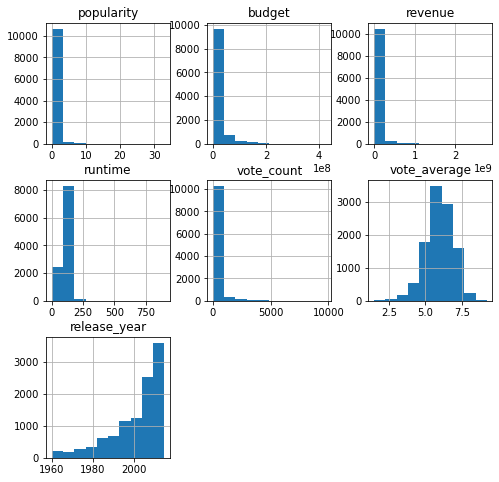

In [16]:
df.hist(figsize=(8,8))
plt.show()

As a first look, we can tell that there is a positive correlation between popularity, budget and revenue as they all sckewed to the right with zero start point. Also we can know that the release year is really sckewed to left which means that movie production has increased over time.

In [17]:
#now i'll save the clean data to csv file
df.to_csv('tmdb-movies_V1.csv',index=False)

<a id='eda'></a>
## Exploratory Data Analysis
Here we will explore and analyse out data through Summary statistics and plots communicating.

### Research Question 1: How is the average vote associate with the budget?

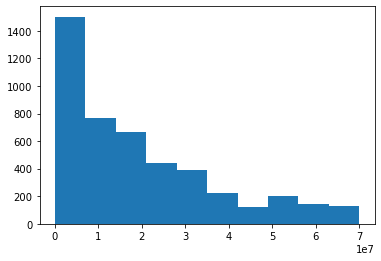

In [18]:
#first lets have a closer look to the budget
plt.hist(df['budget'],range=(1,70000000))
plt.show()

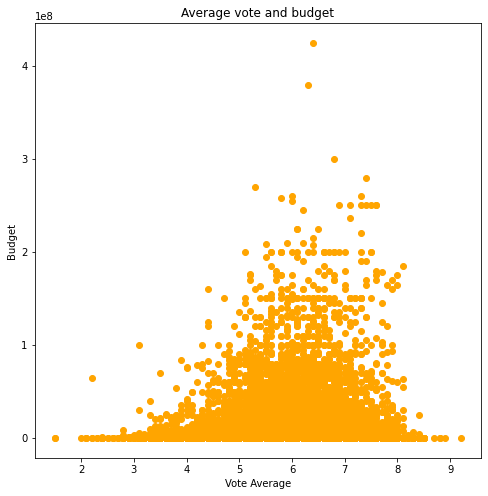

In [19]:
plt.figure(figsize = (8,8))
plt.title('Average vote and budget')
plt.xlabel('Vote Average')
plt.ylabel('Budget')
plt.scatter(df['vote_average'], df['budget'],color='orange')

plt.show()

As shown, there is a slight positive correlation between the movie budget and the average vote, as movies with higher budget correlate with a higher vote_average.

### Rsearch Question 2: How many movies are released year by year ?

In [20]:
most_freq_year=df.groupby('release_year').count()['imdb_id']
most_freq_year.head(10)

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
1965    35
1966    46
1967    40
1968    39
1969    31
Name: imdb_id, dtype: int64

In [21]:
#determine the range of the figure
df.release_year.min(),df.release_year.max()

(1960, 2015)

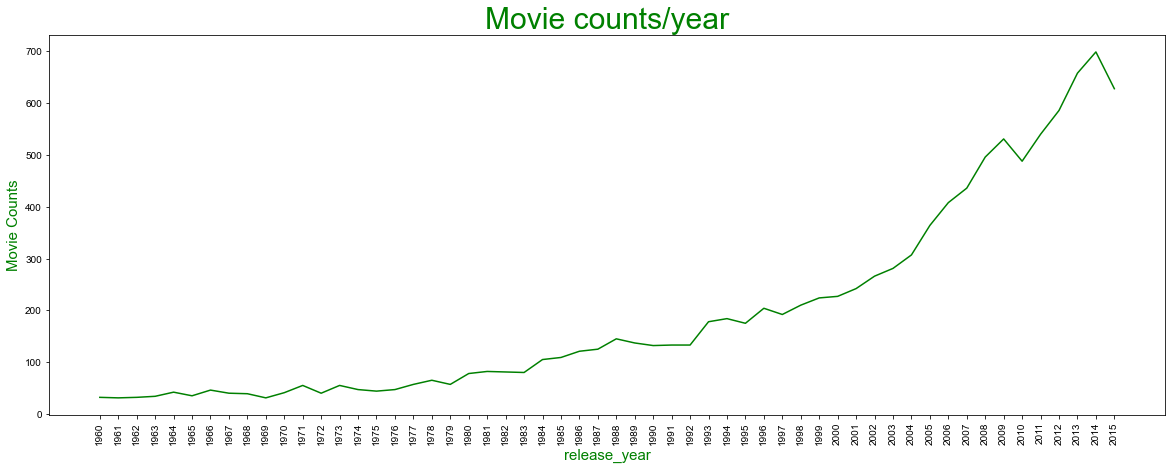

In [22]:
plt.figure(figsize = (20,7))
plt.title('Movie counts/year',fontsize = 30,color='green')
plt.xlabel('Release year',fontsize = 15,color='green')
plt.ylabel('Movie Counts',fontsize = 15,color='green')
most_freq_year.plot(xticks = np.arange(1960,2016,1),color='green')
plt.xticks(rotation=90)
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.show()

So as shown in plot, comparing the given years. 2014 was the rockstar year by releasing 700 movie.

### Research Question 3: what was the most and least profitable movie through the given years?

In [23]:
#making a new column to calculate the net profit
df['profit']=df['revenue'] - df["budget"]

In [24]:
#locating the max and min profitable movie
df.original_title[df['profit'] == df['profit'].max()] , df.original_title[df['profit'] == df['profit'].min()]

(1386    Avatar
 Name: original_title, dtype: object,
 2244    The Warrior's Way
 Name: original_title, dtype: object)

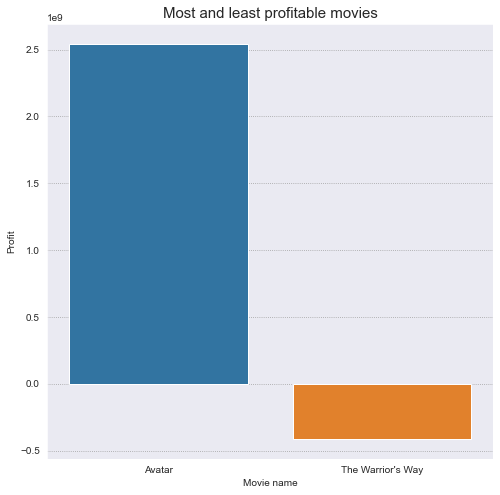

In [25]:
#visual the output
plt.figure(figsize=(8,8))
var1=df[(df.profit == df['profit'].max())|(df.profit == df['profit'].min())]
sns.barplot(x=var1['original_title'], y=var1['profit'],data=var1)
plt.title('Most and least profitable movies',fontsize = 15)
plt.xlabel ('Movie name')
plt.ylabel('Profit')
sns.set_style("whitegrid")
plt.show()

### Research Question 4: what was the top 10 profitable movies in the dataset?


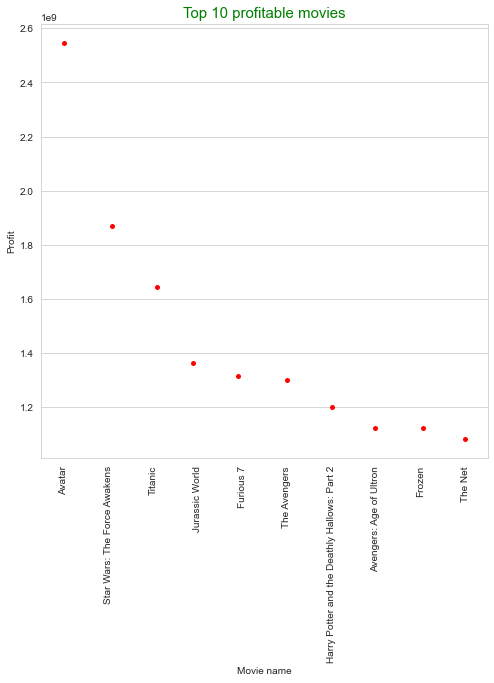

In [26]:
### ploting a bar plot for display the top 10 profitable movies.
plt.figure(figsize=(8,8))
var2=df[['original_title','profit']].sort_values('profit',ascending=False).head(10)
sns.stripplot(x='original_title', y='profit',data = var2,color='red')
plt.title('Top 10 profitable movies',fontsize = 15,color='g')
plt.xlabel ('Movie name')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.show()

### Research Question 5: what was the top 10 popular movies in the dataset?


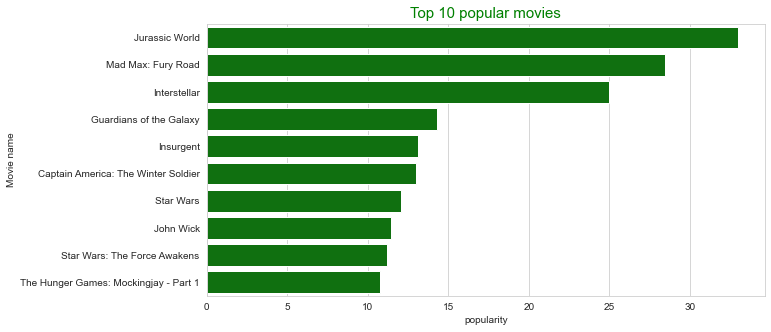

In [27]:
plt.figure(figsize=(10,5))
var2=df[['original_title','popularity']].sort_values('popularity',ascending=False).head(10)
var2
sns.barplot(x='popularity', y='original_title',data = var2,color='green')
plt.title('Top 10 popular movies',fontsize = 15,color='g')
plt.xlabel ('popularity')
plt.ylabel('Movie name')
plt.show()

### Research Question 6: what was the bottom 10 popular movies in the dataset?

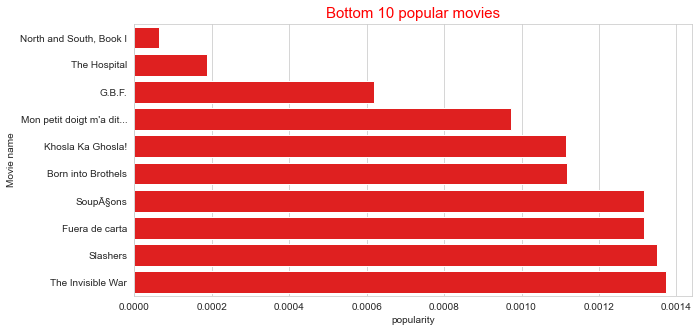

In [28]:
plt.figure(figsize=(10,5))
var3=df[['original_title','popularity']].sort_values('popularity',ascending=True).head(10)
sns.barplot(x='popularity', y='original_title',data = var3,color='red')
plt.title('Bottom 10 popular movies',fontsize = 15,color='r')
plt.xlabel ('popularity')
plt.ylabel('Movie name')
plt.show()

#### Emphasis the positive correlation between popularity and average vote.

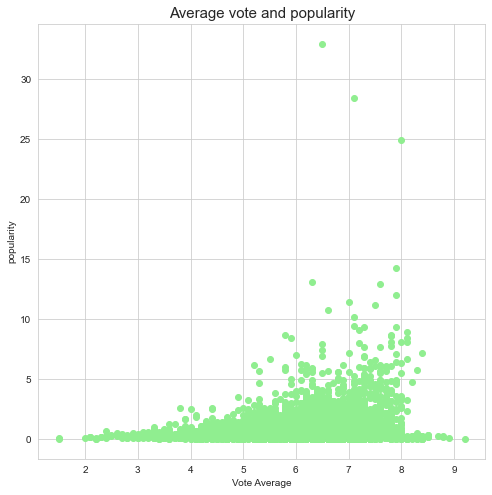

In [29]:
plt.figure(figsize = (8,8))
plt.title('Average vote and popularity',fontsize = 15)
plt.xlabel('Vote Average')
plt.ylabel('popularity')
plt.scatter(df['vote_average'], df['popularity'],color='lightgreen')
plt.show()

As shown there is a strong positive relation between popularity and average vote which is logical as we said before.

<a id='conclusions'></a>
# Conclusions

#### Since my analysis came to an end. we can find a valuable findings and we can find more and more from such huge and interisting dataset like this; after the data wrangling and data cleaning we asked some related questions and now i'll discuss with you the answers to these questions and trying To make it more focused.
### But first let me gathher my questions:

#### Question 1: How is the average vote associate with the budget?
#### Question 2: How many movies are released year by year ?
#### Question 3: what was the most and least profitable movie through the given years?
#### Question 4: what was the top 10 profitable movies in the dataset?
#### Question 5: what was the top 10 popular movies in the dataset?
#### Question 6: what was the bottom 10 popular movies in the dataset?



#### As a fact we knew previously that there is a positive correlation between the popularity, budget and revnue. and now let me answer these questions in points.

### 1- There is a slight positive correlation between the movie budget and the average vote, as movies with higher budget correlate with a higher vote_average.
### 2- Comparing the given years from 1960 to 2015. 2014 was the rockstar year by releasing 700 movie.
### 3- the most profitable movie was 'Avatar', and the least profitable movie was 'The Warrior's Way' with total loss by 413 million dollars.

### 4- here is a list with the top 10 profitable movies with the profit amount in Dollars:
###### -Avatar with profit '2544505847'
###### -Star Wars: The Force Awakens with profit '1868178225'   
###### -Titanic with profit '1645034188'   
###### -Jurassic World with profit '1363528810'   
###### -Furious 7 with profit '1316249360'   
###### -The Avengers with profit '1299557910'   
###### -Harry Potter and the Deathly Hallows: Part 2 with profit '1202817822'   
###### -Avengers: Age of Ultron with profit '1125035767'   
###### -Frozen	with profit '1124219009'   
###### -The Net with profit '1084279658'   



### 5- and here is a list with the top 10 popular movies associated with high ranking votings:
###### -Jurassic World
###### -Mad Max: Fury Road
###### -Interstellar
###### -Guardians of the Galaxy
###### -Insurgent
###### -Captain America: The Winter Soldier
###### -Star Wars
###### -John Wick
###### -Star Wars: The Force Awakens
###### -The Hunger Games: Mockingjay - Part 1



### 6- and finally a list with the bottom 10 popular movies associated with low ranking votes
###### -North and South, Book I	
###### -The Hospital
###### -G.B.F.
###### -Mon petit doigt m'a dit...
###### -Khosla Ka Ghosla!
###### -Born into Brothels
###### -SoupÃ§ons
###### -Fuera de carta
###### -Slashers
###### -The Invisible War

### Limitations
-I found it kind of illogical to have many Zero values in the budget column (approximately 5690 Column); is it possible to produce all these amount of movies with zero budget? i felt these values messed my analysis a bit and i tried to replace these Zero values with the average total budget but then i realized that would cause more chaos and confusion to my conclusion.

-Also i wasn't sure about the currency unite; was it converted to American Dollars or not? but i assumed that all values were in USD anyway to standardize my data.

In [31]:
#from subprocess import call
#call(['python', '-m', 'nbconvert', 'tmdb_movies_analysis.ipynb'])